# **K-Means Clustering using Crime Stats Dataset**

---



#### **Loading libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
crimesdf = pd.read_csv('CrimeStats.csv')
crimesdf.head(3)

,State/UT,2022 - CR,2022 - CCS,2022 - CON,2022 - PAR,2022 - PCS,2022 - PCV
0,Andhra Pradesh,25503,24456,414,30846,53444,716
1,Arunachal Pradesh,335,268,29,319,333,29
2,Assam,14148,12108,512,19789,13968,548


In [4]:
crimesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State/UT    36 non-null     object
 1   2022 - CR   36 non-null     int64 
 2   2022 - CCS  36 non-null     int64 
 3   2022 - CON  36 non-null     int64 
 4   2022 - PAR  36 non-null     int64 
 5   2022 - PCS  36 non-null     int64 
 6   2022 - PCV  36 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB


In [ ]:
# Research Objective - Cluster/Group States/UT based on Similarities
# Simlarity is assessed based on Euclidean Distance

In [5]:
state_name = crimesdf['State/UT']

In [6]:
crimesdf.drop(['State/UT'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler

crimesdf_scaled = StandardScaler().fit_transform(crimesdf)

In [8]:
# crimesdf_scaled is a numpy array right now after scaling
# So we convert into pandas dataframe

crimesdf_scaled = pd.DataFrame(crimesdf_scaled, columns=crimesdf.columns)
crimesdf_scaled.head(3)

,2022 - CR,2022 - CCS,2022 - CON,2022 - PAR,2022 - PCS,2022 - PCV
0,0.837024,1.204952,-0.269531,0.974407,1.364824,-0.209218
1,-0.766827,-0.777603,-0.430331,-0.661194,-0.642206,-0.388722
2,0.113418,0.192855,-0.228601,0.381986,-0.126948,-0.253114


In [ ]:
# Elbow Method - Elbow Plot is x-axis is Cluster Number and y-axis is WCSS
# Optimal Number of Clusters or K value is elbow point
# For Elbow plot method multiple cluster models will be built from n_cluster=1 till
# n_cluster=15.
# For each model WCSS or inertia is calculated and will be plotted

#### **Elbow Plot Method to Find Optimal K**

In [9]:
from sklearn.cluster import KMeans

In [10]:
import warnings
warnings.filterwarnings("ignore") # for cleaner notebook

In [11]:
# Build multiple models n_clusters=1, n_clusters=2,n_cluster2=3,......n_clusters=15
wcss_list = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, n_init="auto", random_state=42)
  kmeans.fit(crimesdf_scaled)
  wcss_list.append(kmeans.inertia_)

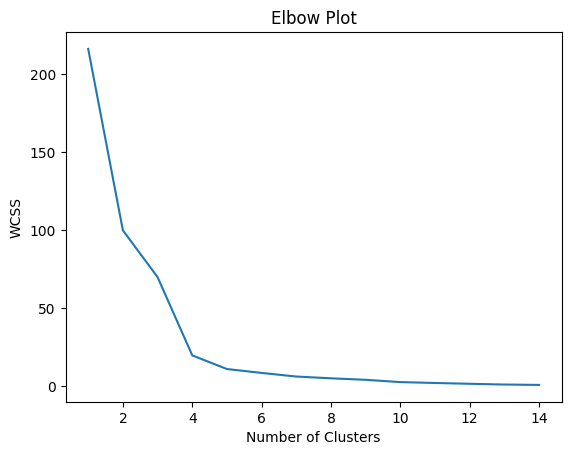

In [12]:
# Create Elbow Plot
plt.plot(range(1,15), wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()
# K=5 seems to be the elbow point

**K = 5 seems to be the elbow point** so we take 5 as optimal K

In [13]:
cluster_model = KMeans(n_clusters=5, n_init="auto", random_state=42).fit(crimesdf_scaled)

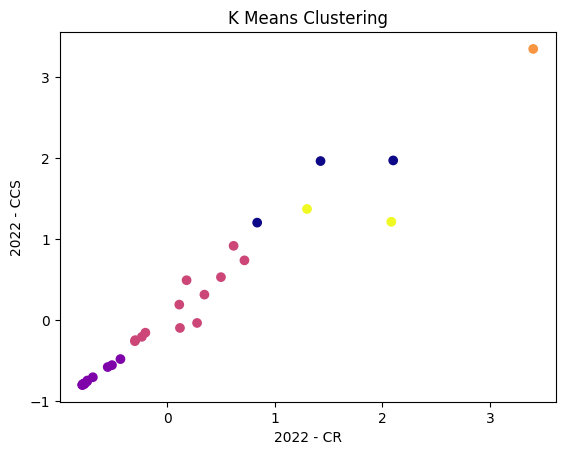

In [14]:
# '2022 - CR' (Total Cognizable Crimes) and
# '2022 - CCS' (Cognizable Crimes under Special and Local Laws)
# were chosen for visualization as they represent major categories of crime
# and provide a broad overview of criminal activity relevant to clustering
plt.scatter(crimesdf_scaled['2022 - CR'],crimesdf_scaled['2022 - CCS'], c=cluster_model.labels_, cmap="plasma")
plt.xlabel('2022 - CR')
plt.ylabel('2022 - CCS')
plt.title('K Means Clustering')
plt.show()

In [15]:
np.round(cluster_model.cluster_centers_,0)
# Cluster 1 - [36679.0, 28619.0, 2610.0, 30026.0, 50623.0, 3506.0] - High Crime
# Cluster 2  - [1389.0, 1060.0, 128.0, 1458.0, 1596.0, 152.0] - Low Crime
# Cluter 3   - [15430.0, 12484.0, 868.0, 16014.0, 18750.0, 1132.0], Medium Crime
# Cluster 4  - [65743.0, 50616.0, 13099.0, 101754.0, 134087.0, 21729.0]]) - Very High

array([[ 1.,  2., -0.,  1.,  2., -0.],
       [-1., -1., -0., -1., -1., -0.],
       [ 0.,  0., -0.,  0.,  0., -0.],
       [ 3.,  3.,  5.,  5.,  4.,  5.],
       [ 2.,  1.,  2.,  1.,  1.,  1.]])

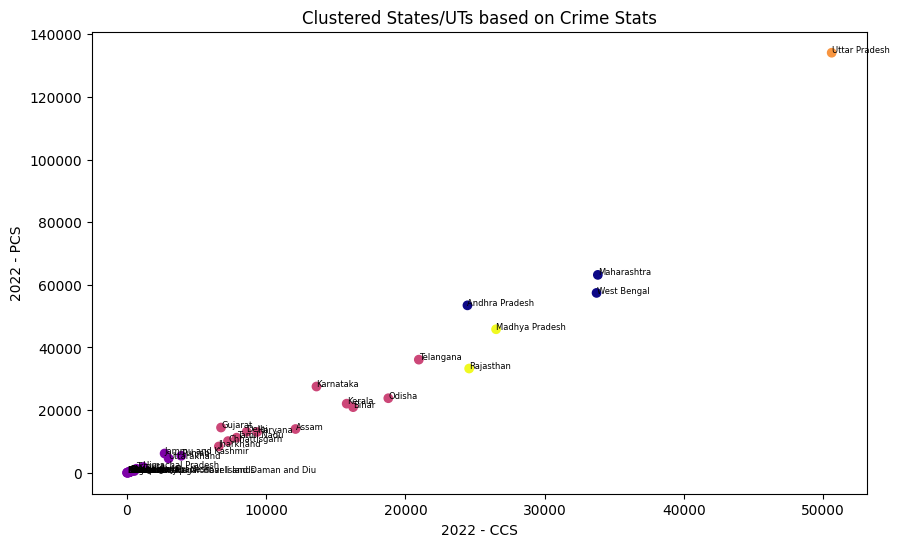

In [17]:
# Scatter plot with clusters
plt.figure(figsize=(10, 6))
plt.scatter(crimesdf['2022 - CCS'], crimesdf['2022 - PCS'],
            c=cluster_model.labels_, cmap="plasma")

# Add state/UT names to the cluster points
for i, txt in enumerate(state_name):
    plt.annotate(txt, (crimesdf['2022 - CCS'][i], crimesdf['2022 - PCS'][i]), fontsize=6)

plt.title("Clustered States/UTs based on Crime Stats")
plt.xlabel('2022 - CCS')
plt.ylabel('2022 - PCS')
plt.show()

**As usual Uttar Pradesh is the OG**

In [19]:
crimesdf['State/UT']=state_name

In [20]:
crimesdf['Cluster Number']=cluster_model.labels_

In [21]:
crimesdf.tail()

,2022 - CR,2022 - CCS,2022 - CON,2022 - PAR,2022 - PCS,2022 - PCV,State/UT,Cluster Number
31,14247,8595,442,15112,13074,604,Delhi,2
32,3716,2705,68,6309,6147,155,Jammu and Kashmir,1
33,15,15,1,17,17,1,Ladakh,1
34,16,13,2,12,13,2,Lakshadweep,1
35,200,153,2,332,260,3,Puducherry,1


#### **Silhoutte Score Method to check quality of Cluster Formation**

Here's how the Silhouette score is calculated for a single data point [1]:

**1.Calculate the average distance to other points in the same cluster (a):** This measures how cohesive the point is with its own cluster.

**2.Calculate the average distance to points in the nearest different cluster (b):** This measures how well-separated the point is from other clusters.

**3.Calculate the Silhouette score (S) for the point:** The formula for the Silhouette score is:

S = (b - a) / max(a, b)



In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhoutte=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=42)
    kmeans.fit(crimesdf_scaled)
    labels=kmeans.labels_
    silhoutte.append(silhouette_score(crimesdf_scaled,kmeans.labels_))

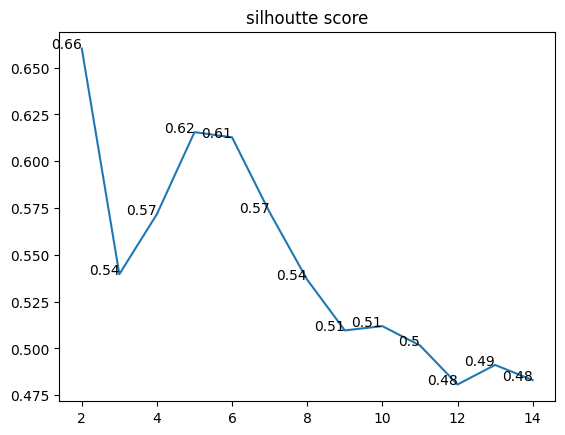

In [24]:
plt.plot(range(2,15),silhoutte)
plt.title('silhoutte score')
for i,j in enumerate(silhoutte):
    plt.text(range(2,15)[i],j,round(j,2),ha="right")
plt.show()

1. Optimal Number of Clusters in 5 Clusters as it gives clear Segmentation
2. Silhoutte Score for 2 Cluster is highest but it will be very narrow segmentation
3. Marginal difference between 2 cluster and 5 cluster model

#### **Hierarchical Clustering**

In [25]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [26]:
linkages=linkage(crimesdf_scaled,method="ward")

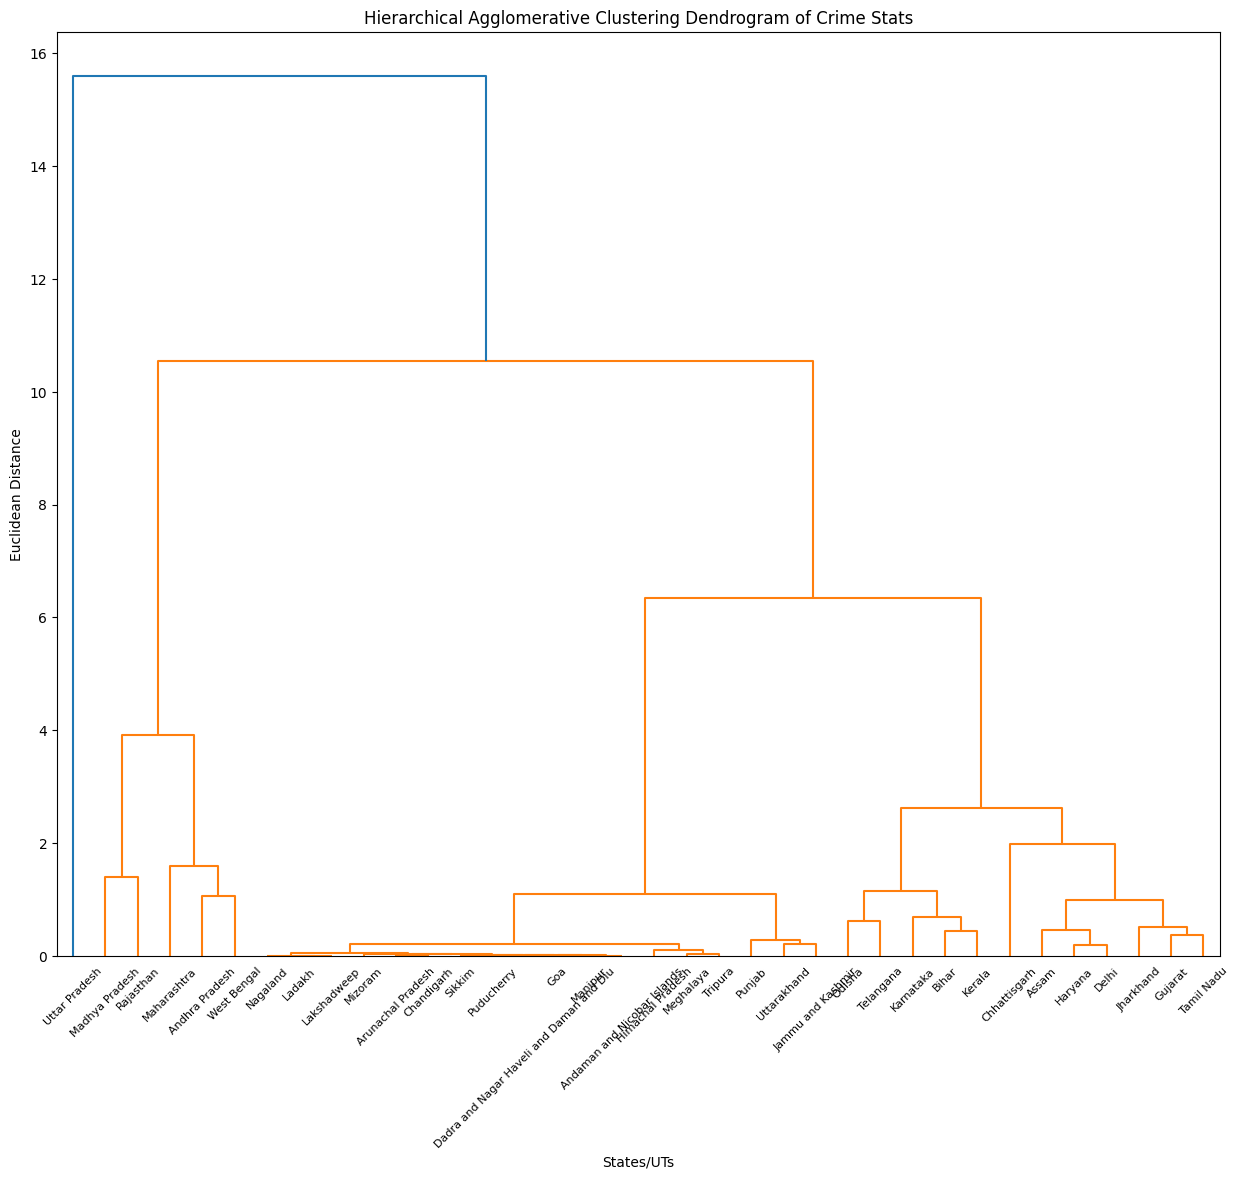

In [29]:
plt.figure(figsize=(15,12))
dendrogram(linkages,labels=state_name.values, orientation="top",
           distance_sort="ascending",show_leaf_counts=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram of Crime Stats') # Added title
plt.xlabel('States/UTs') # Added x-label for clarity
plt.ylabel('Euclidean Distance') # Added y-label for clarity
plt.show()

#### **Density Based Clustering: DBSCAN**

DBSCAN requires 2 parameters:
1. Epsilon(eps) - least distance required for 2 points to be termed as neighbors
2. MinPoints = minimum number of points needed to construct a cluster

**Epsilon Calculation using Nearest Neighbours Algorithm**

In [30]:
from sklearn.neighbors import NearestNeighbors

In [31]:
nearest_nbrs=NearestNeighbors(n_neighbors=5).fit(crimesdf_scaled)

In [32]:
distances,indices=nearest_nbrs.kneighbors(crimesdf_scaled)

In [33]:
distances=np.sort(distances[:,1])

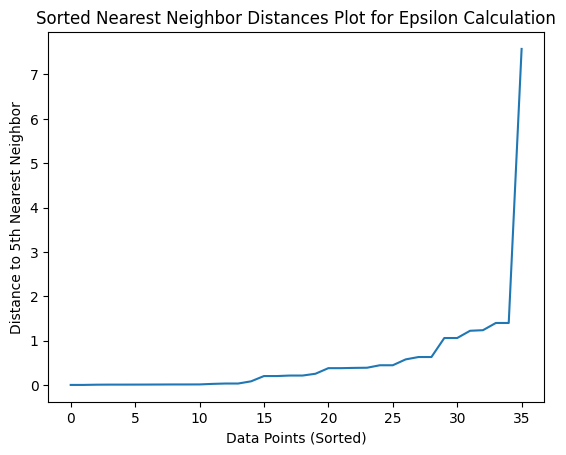

In [35]:
plt.plot(distances)
plt.title('Sorted Nearest Neighbor Distances Plot for Epsilon Calculation') # Added title
plt.xlabel('Data Points (Sorted)') # Added x-label
plt.ylabel('Distance to 5th Nearest Neighbor') # Added y-label for clarity
plt.show()

**Epsilon value is 1.5 as it is becoming straigtline from that point**

**Running DBSCAN with epsilo=1.5 and minpoint=5 to get Clusters**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscn=DBSCAN(eps=1.5,min_samples=5).fit(crimesdf_scaled)

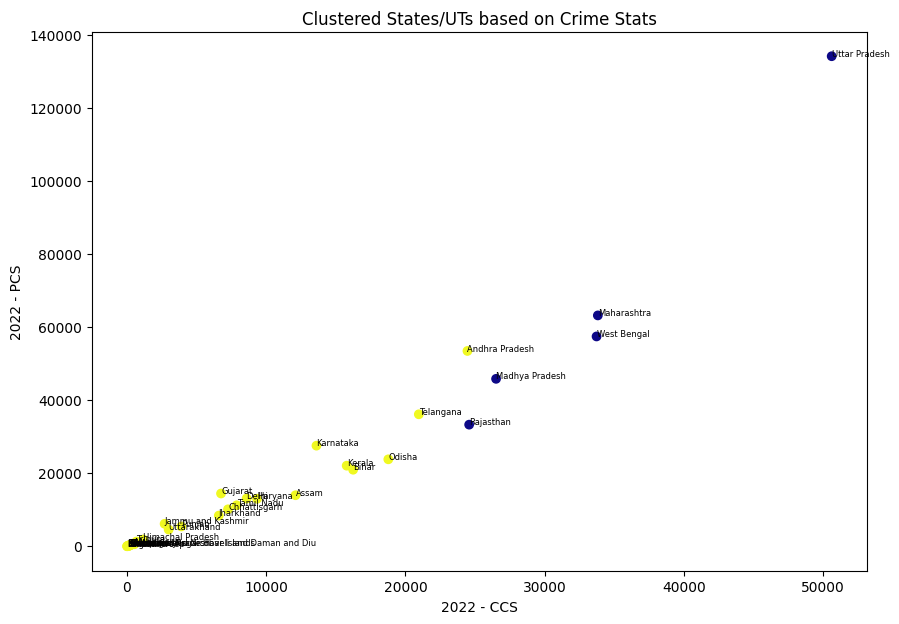

In [ ]:
# Scatter plot with clusters
plt.figure(figsize=(10, 7))
plt.scatter(crimesdf['2022 - CCS'], crimesdf['2022 - PCS'],
            c=dbscn.labels_, cmap="plasma")

# Add state/UT names to the cluster points
for i, txt in enumerate(state_name):
    plt.annotate(txt, (crimesdf['2022 - CCS'][i], crimesdf['2022 - PCS'][i]), fontsize=6)

plt.title("Clustered States/UTs based on Crime Stats")
plt.xlabel('2022 - CCS')
plt.ylabel('2022 - PCS')
plt.show()